# 인공지능
## 지도학습: 문제,정답을 알려주고 패턴을 찾는 것
* 분류분석, 회귀분석
## 비지도학습 : 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석

# 분류분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무 (Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
### 장점
* 직관적이고 해석 쉬움
* feature scling(변수)이 필요 없음(MinMax, StandarfScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석할 수 있음
* 시각화가 쉽고 직관적 
### 단점 
* 과적합(overfitting)이 잘 일어남
너무 훈련 데이터에 핏하게 되면 새로운 데이터를 못 받아들인다. 100% 맞출때 조심
* 최적 트리를 찾기 어렵고 시간이 오래걸릴 수 있음

# 타이타닉 데이터 분석하기

0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리(결측값처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자-> 숫자, 상관관계)
4. Feature Engineering(변수 선택, 새로운 특성 생성, 카테고리 변수의 더미 변수화
   (one-hot encoding)
5. 최종 선택된 변수를 독립변수(x)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. sklearn에서 DecisionTreeClassifier를 불러와서 모델훈련
8. test 세트를 모델에 넣어서 예측값 생성(pred)
9. accuracy_score(), classification_report()를 이용해서 모델의 성능 확인

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [59]:
df = pd.read_csv("./data/Titanic_train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
age_na = df[df['Age'].isna()].index
age_na 

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [63]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [64]:
df['Age'].isna().sum()

np.int64(0)

In [65]:
df.loc[age_na ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [66]:
embarked_na = df[df['Embarked'].isna()].index
df.loc[embarked_na]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [67]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [69]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [70]:
df.loc[embarked_na]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [71]:
df['Embarked'][61]

'S'

In [72]:
df = df.drop('Cabin', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# 이상값 찾기

In [73]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
num = df.describe()

In [75]:
num_min = num.loc['25%','Fare'] - (1.5 * (num.loc['75%','Fare']- num.loc['25%','Fare']))
num_max = num.loc['75%','Fare'] + (1.5 * (num.loc['75%','Fare']- num.loc['25%','Fare']))

In [76]:
num_min

np.float64(-26.724)

In [77]:
num_max

np.float64(65.6344)

In [133]:
class_1 = df[df['Pclass'] == 1]
class_2 = df[df['Pclass'] == 2]
class_3 = df[df['Pclass'] == 3]

num_max1 = class_1.describe().loc['75%','Fare'] + (1.5 * (class_1.describe().loc['75%','Fare']- class_1.describe().loc['25%','Fare']))
num_max2 = class_2.describe().loc['75%','Fare'] + (1.5 * (class_2.describe().loc['75%','Fare']- class_2.describe().loc['25%','Fare']))
num_max3 = class_3.describe().loc['75%','Fare'] + (1.5 * (class_3.describe().loc['75%','Fare']- class_3.describe().loc['25%','Fare']))
print(num_max1,num_max2,num_max3)

117.700075 45.5 27.125


<Axes: ylabel='Frequency'>

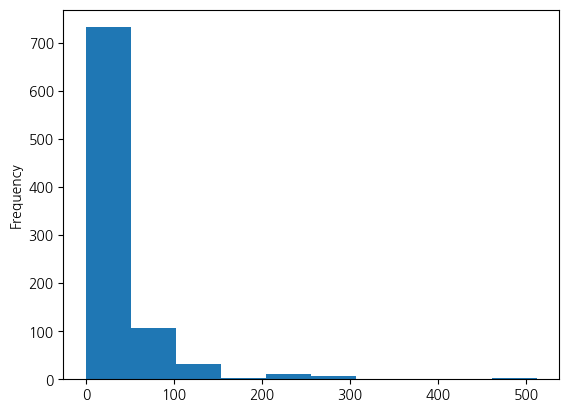

In [117]:
df['Fare'].plot(kind="hist")

In [134]:
outlier_iqr1 = class_1[class_1['Fare'] > num_max1 ]
outlier_iqr2 = class_2[class_2['Fare'] > num_max2]
outlier_iqr3 = class_3[class_3['Fare'] > num_max3 ]

In [77]:
outlier_iqr = df[df['Fare'] > num_max]
outlier_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [135]:
outlier_iqr1.loc[:,'Fare'] = num_max1
outlier_iqr2.loc[:,'Fare'] = num_max2
outlier_iqr3.loc[:,'Fare'] = num_max3

In [78]:
fair_pclass = df[['Pclass','Fare']].groupby('Pclass').describe()
fair_pclass

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [79]:
fair_pclass.columns


MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [80]:
p1_upper_bound = fair_pclass.loc[1,('Fare', '75%')]+(1.5*(fair_pclass.loc[1,('Fare', '75%')]-fair_pclass.loc[1,('Fare', '25%')]))
p1_upper_bound

np.float64(187.364075)

In [81]:
p1_outlier = df.loc[df['Fare']> p1_upper_bound] 
p1_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [261]:
df.loc[df['Fare']> p1_upper_bound, 'Fare'] = p1_upper_bound

In [262]:
df.loc[df['Fare'] > num_max, 'Fare']

1       71.283300
27     187.364075
31     146.520800
34      82.170800
52      76.729200
          ...    
846     69.550000
849     89.104200
856    164.866700
863     69.550000
879     83.158300
Name: Fare, Length: 116, dtype: float64

In [263]:
class_2.loc[class_2['Fare'] > num_max2, 'Fare']

72     65.6344
120    65.6344
385    65.6344
615    65.0000
655    65.6344
665    65.6344
754    65.0000
Name: Fare, dtype: float64

In [264]:
class_3.loc[class_3['Fare'] > num_max3, 'Fare']

13     31.2750
16     29.1250
25     31.3875
50     39.6875
59     46.9000
63     27.9000
71     46.9000
74     56.4958
86     34.3750
119    31.2750
147    34.3750
159    65.6344
164    39.6875
167    27.9000
169    56.4958
171    29.1250
180    65.6344
182    31.3875
201    65.6344
233    31.3875
261    31.3875
266    39.6875
278    29.1250
324    65.6344
360    27.9000
386    46.9000
436    34.3750
480    46.9000
509    56.4958
541    31.2750
542    31.2750
610    31.2750
634    27.9000
638    39.6875
642    27.9000
643    56.4958
678    46.9000
683    46.9000
686    39.6875
692    56.4958
736    34.3750
787    29.1250
792    65.6344
813    31.2750
819    27.9000
824    39.6875
826    56.4958
838    56.4958
846    65.6344
850    31.2750
863    65.6344
885    29.1250
Name: Fare, dtype: float64

In [265]:
outlier_index1 = class_1.loc[class_1['Fare'] > num_max1, 'Fare'].index
outlier_index2 = class_2.loc[class_2['Fare'] > num_max2, 'Fare'].index
outlier_index3 = class_3.loc[class_3['Fare'] > num_max3, 'Fare'].index

In [123]:
class_1.loc[class_1['Fare'] > num_max1, 'Fare'] = num_max1
class_2.loc[class_1['Fare'] > num_max1, 'Fare'] = num_max1
class_3.loc[class_1['Fare'] > num_max1, 'Fare'] = num_max1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


<Axes: ylabel='Frequency'>

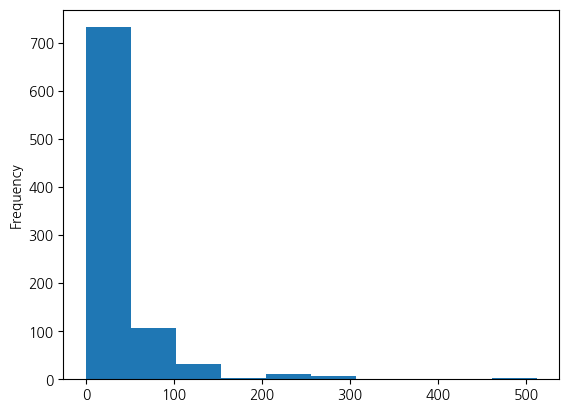

In [82]:
df["Fare"].plot(kind="hist")

In [83]:
df[(df['Pclass']== 1)& (df['Fare']> 150)].sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.000000,2,2,PC 17608,262.3750,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C


In [84]:
 tf = df.groupby('Ticket').value_counts(sort=True)

In [85]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

# EDA

In [170]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [86]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

<Axes: xlabel='Survived'>

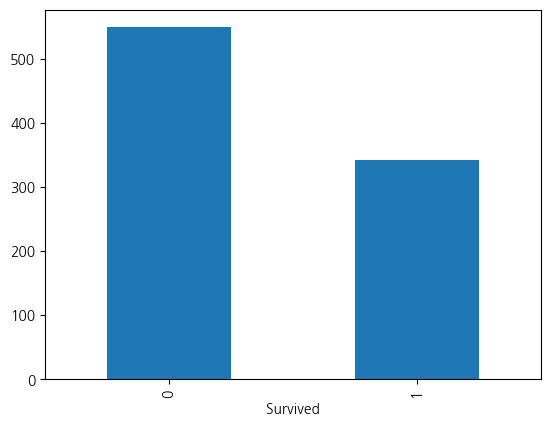

In [87]:
df['Survived'].value_counts().plot(kind="bar")

<Axes: xlabel='Pclass'>

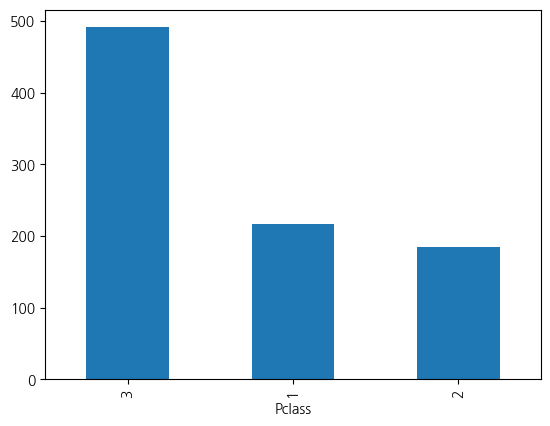

In [88]:
df['Pclass'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

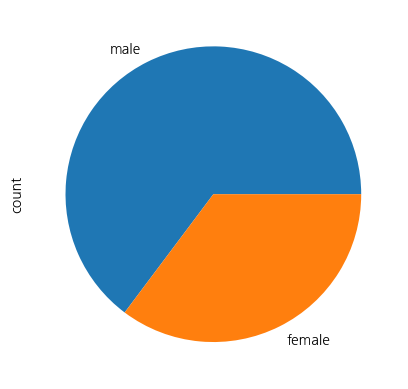

In [89]:
df['Sex'].value_counts().plot(kind="pie")

<Axes: ylabel='Frequency'>

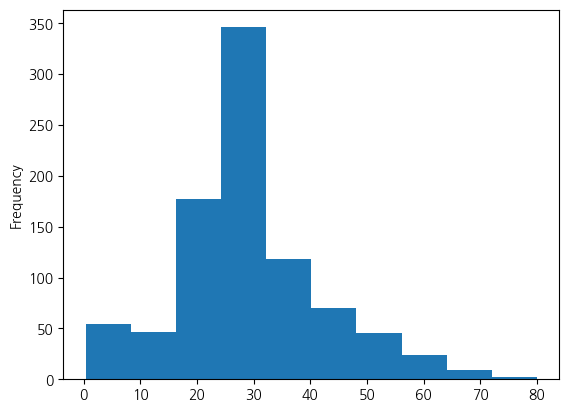

In [90]:
df['Age'].plot(kind="hist")

<Axes: xlabel='SibSp'>

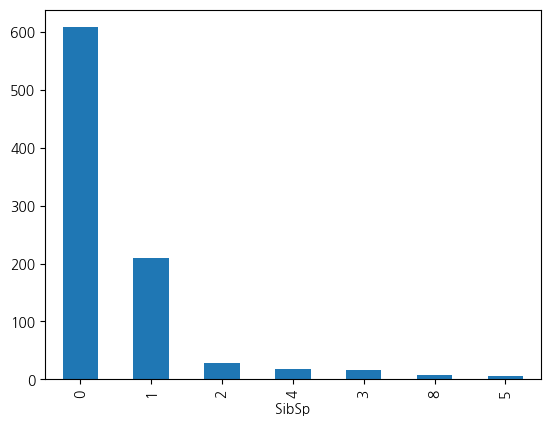

In [91]:
df['SibSp'].value_counts().plot(kind="bar")

<Axes: xlabel='Parch'>

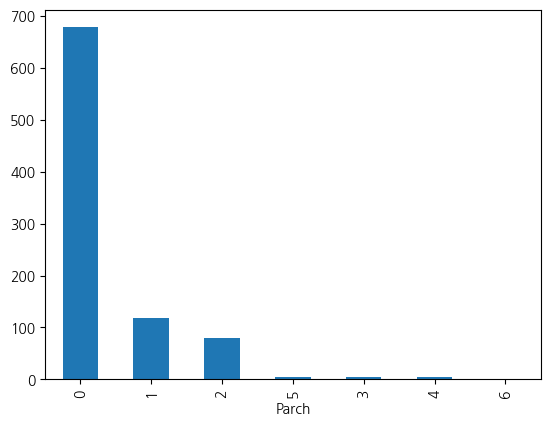

In [92]:
df['Parch'].value_counts().plot(kind="bar")

In [93]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

<Axes: ylabel='Frequency'>

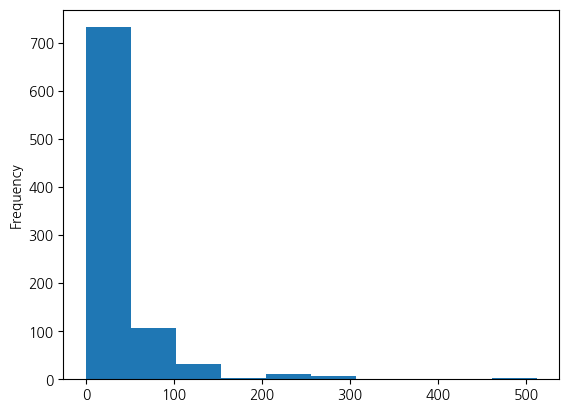

In [94]:
df['Fare'].plot(kind="hist")

<Axes: xlabel='Embarked'>

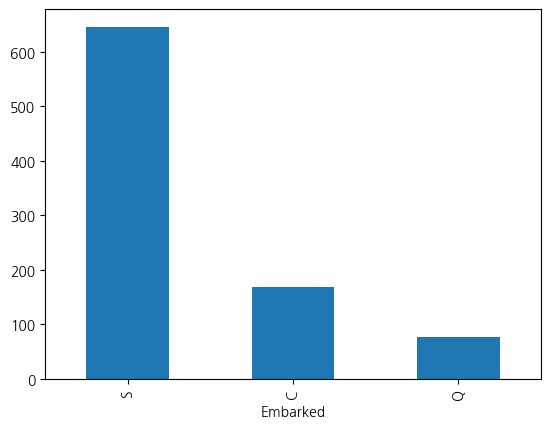

In [95]:
df['Embarked'].value_counts().plot(kind="bar")

In [96]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)


In [97]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [98]:
df[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [99]:
df[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [100]:
df[["SibSp","Survived"]].groupby("SibSp").mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [101]:
df[['Parch',"Survived"]].groupby('Parch').mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [102]:
df[["Embarked","Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [103]:
df['Age'] = pd.cut(df['Age'], 
       bins= [0,10,20,30,40,50,60,70,80,90],
       labels= ["10under" , "10s","20s","30s","40s","50s","60s","70s","80s"],
        right= False)

In [104]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,20s,1,0,7.2500,S
1,1,1,female,30s,1,0,71.2833,C
2,1,3,female,20s,0,0,7.9250,S
3,1,1,female,30s,1,0,53.1000,S
4,0,3,male,30s,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,13.0000,S
887,1,1,female,10s,0,0,30.0000,S
888,0,3,female,20s,1,2,23.4500,S
889,1,1,male,20s,0,0,30.0000,C


In [105]:
df[["Age","Survived"]].groupby("Age").mean()

/var/folders/nx/gn9chw0937n9_jgmhqpb8xkw0000gp/T/ipykernel_49855/3891476000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["Age","Survived"]].groupby("Age").mean()


,Survived
Age,
10under,0.612903
10s,0.401961
20s,0.324937
30s,0.437126
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80s,1.000000


In [120]:
df["family"] = df["SibSp"] + df["Parch"]

In [121]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,20s,1,0,S,1
1,1,1,female,30s,1,0,C,1
2,1,3,female,20s,0,0,S,0
3,1,1,female,30s,1,0,S,1
4,0,3,male,30s,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,S,0
887,1,1,female,10s,0,0,S,0
888,0,3,female,20s,1,2,S,3
889,1,1,male,20s,0,0,C,0


In [122]:
df = df.drop(["SibSp","Parch"], axis=1)

In [237]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,20s,7.2500,S,1
1,1,1,female,30s,71.2833,C,1
2,1,3,female,20s,7.9250,S,0
3,1,1,female,30s,53.1000,S,1
4,0,3,male,30s,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,20s,13.0000,S,0
887,1,1,female,10s,30.0000,S,0
888,0,3,female,20s,23.4500,S,3
889,1,1,male,20s,30.0000,C,0


In [123]:
df[['family','Survived']].groupby('family').mean().sort_values(by='Survived', ascending=False)

,Survived
family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [128]:
df[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().sort_values(by='Survived', ascending=False)

,,Survived
Pclass,Sex,
1,female,0.968085
2,female,0.921053
3,female,0.500000
1,male,0.368852
2,male,0.157407
3,male,0.135447


# Feature Engineering

In [126]:
df = df.drop('Fare', axis=1)
df

KeyError: 'Fare'

one hot encoding으로 분리하기

In [129]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family'], dtype='object')

In [143]:
df = pd.get_dummies(df, columns=['Sex', 'Age', 'Embarked', 'family'], drop_first=True)

In [144]:
df

,Survived,Pclass,Sex_male,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,...,Embarked_Q,Embarked_S,family_1,family_2,family_3,family_4,family_5,family_6,family_7,family_10
0,0,3,True,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,1,1,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,3,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,0,3,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
887,1,1,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
888,0,3,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
889,1,1,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 데이터셋을 트레이닝과 테스트 세트로 분리하기

In [145]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [146]:
X

,Pclass,Sex_male,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Embarked_Q,Embarked_S,family_1,family_2,family_3,family_4,family_5,family_6,family_7,family_10
0,3,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
887,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
888,3,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
889,1,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [147]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=777)

# 데이터 분석 돌려주기

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [151]:
dtc = DecisionTreeClassifier(random_state=777)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

0.7276119402985075
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       160
           1       0.73      0.52      0.61       108

    accuracy                           0.73       268
   macro avg       0.73      0.69      0.70       268
weighted avg       0.73      0.73      0.72       268

